# TAREA 4

### PANDAS: Zona de habitabilidad de exoplanetas 

Base de datos de exoplanetas encontrados hasta el momento.



In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
exo = pd.read_csv("exoplanets.csv")

/Users/daniandreacosmo/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,5,10,11,17,18,23,24,26,27,30,33,38,39,44,45,50,51,56,57,62,63,70,71,73,74,79,80,81,82,88,89,95,96,105,106,109,110,115,116,117,124,125,130,131,137,143,144,149,150,159,160,161,162,172,173,174,179,180,182,188,189,195,196,201,202,205,206,211,212,217,218,223,224,229,230,235,236,241,242,247,248,253,254,259,260,265,266,268,269,270,271,273,278,279,284,285,290,291,294,295,301,302,304,305,310,311) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Constantes a Utilizar

sigma = 5.670374419*(10**(-8)) * (696350000)**2  #Constante de Stefan–Boltzmann en radios solares
sun_lum = 3.83*10**26   #luminosidad del Sol

Ts = 5780 
ai = 2.7619e-5
bi = 3.8095e-9
ao = 1.3786e-4
bo = 1.4286e-9
ris = 0.72
ros = 1.77

In [5]:
exo.head()

,A,AUPPER,ALOWER,UA,AREF,AURL,AR,ARUPPER,ARLOWER,UAR,...,VREF,VURL,VSINI,VSINIUPPER,VSINILOWER,UVSINI,VSINIREF,VSINIURL,KEPID,KDE
0,0.078010,0.001300,0.001300,0.001300,Calculated,http://adsabs.harvard.edu/abs/2006ApJ...646..505B,11.9153,0.443805,0.443805,0.443805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.034472,0.000676,0.000676,0.000676,Calculated,http://adsabs.harvard.edu/abs/2006ApJ...646..505B,15.1619,0.974724,0.974724,0.974724,...,NaN,NaN,NaN,NaN,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,NaN,1
2,0.137610,0.002897,0.002897,0.002897,Calculated,http://adsabs.harvard.edu/abs/2006ApJ...646..505B,31.8896,3.494090,3.494090,3.494090,...,NaN,NaN,NaN,NaN,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,NaN,1
3,0.091351,0.001903,0.001903,0.001903,Calculated,http://adsabs.harvard.edu/abs/2006ApJ...646..505B,14.5835,2.181770,2.181770,2.181770,...,NaN,NaN,3.0,1.0,1.0,1.0,Hebrard 2014,http://adsabs.harvard.edu/abs/2014A%26A...572A...,NaN,1
4,0.185149,0.008817,0.008817,0.008817,Calculated,http://adsabs.harvard.edu/abs/2006ApJ...646..505B,33.2523,10.100600,10.100600,10.100600,...,NaN,NaN,NaN,NaN,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,NaN,1


In [6]:
exo_zone = exo[["NAME","TEFF", "MASS", "A", "DENSITY", "R", "STAR", "MSTAR", "RSTAR", "BINARY"]]
exo_zone.head()

,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY
0,Kepler-107 d,5851.0,0.003712,0.078010,NaN,0.095459,Kepler-107,NaN,1.411,0.0
1,Kepler-1049 b,3864.0,0.002453,0.034472,NaN,0.085000,Kepler-1049,0.51,0.490,0.0
2,Kepler-813 b,5743.0,0.015970,0.137610,NaN,0.191000,Kepler-813,0.95,0.930,0.0
3,Kepler-427 b,5800.0,0.290000,0.091351,0.16,1.230000,Kepler-427,0.96,1.350,0.0
4,Kepler-1056 b,6127.0,0.027126,0.185149,NaN,0.269000,Kepler-1056,1.12,1.200,0.0


Cada columna coresponde a:

- NAME
- TEFF: temperatura efectiva de la estrella.
- MASS: Masa del planeta.
- A: semieje mayor.
- DENSITY: densidad.
- R: radio del planeta.
- STAR: Nombre de la estrella.
- MSTAR: Masa de la estrella.
- RSTAR: Radio de la estrella.
- BINARY: indica si el sistema es binario o no.

In [7]:
#Observar los datos de la columna que dice si el sistema es binario o no
exo_zone["BINARY"].value_counts()

0.0    2526
1.0     737
Name: BINARY, dtype: int64

In [8]:
#Descarte los sistemas binarios i.e. BINARY==0.
exo_zone = exo_zone[exo_zone["BINARY"] != 0.0]
exo_zone["BINARY"].value_counts()

1.0    737
Name: BINARY, dtype: int64

In [9]:
#MASSE: La masa de los planetas de masas de Jupiter a unidades de masa de la Tierra -> 1MJ = 317.8MT
exo_zone["MASSE"] = exo_zone[["MASS"]]*(317.8) 

In [10]:
#RE: El radio de los planetas de radios de Jupiter a radios terrestres -> 1RJ = 11.209RT
exo_zone["RE"] = exo_zone[["R"]]*(11.209)

In [11]:
# LUM: Luminosidad de una estrella (L = 4πR^2σT^4), R es el radio de la estrella, σ la constante de Stefan-Boltzmann
#Luminosidad está Watts, por lo tanto se pasa a Luminosidad respecto a la del Sol --> LS = 3.83MW

exo_zone["LUM"] = (4*np.pi*(exo_zone["RSTAR"]**2)*sigma*(exo_zone["TEFF"]**4))/sun_lum 

Límites interior (ri) y exterior (ro) de la zona de habitabilidad:

$$ ri = [r_{is} − a_i(T_{eff} − T_s) − bi(T_{eff} − T_s)^2] \sqrt{L}$$
$$ ro = [r_{os} − a_o(T_{eff} − T_s) − bo(T_{eff} − T_s)^2] \sqrt{L}$$

In [12]:
#Límites de la zona de habitabilidad y asigne a estos las columnas ri y ro.
exo_zone["RI"] = (ris - ai*(exo_zone["TEFF"] - Ts) - bi*(exo_zone["TEFF"] - Ts)**2)*exo_zone["LUM"].apply(np.sqrt)
exo_zone["RO"] =(ros - ao*(exo_zone["TEFF"] - Ts) - bo*(exo_zone["TEFF"] - Ts)**2)*exo_zone["LUM"].apply(np.sqrt)

In [13]:
#Reinicio índice y observo el nuevo dataframe
exo_zone.reset_index(inplace=True)
exo_zone.head()

,index,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY,MASSE,RE,LUM,RI,RO
0,14,Kepler-20 b,5466.0,0.026665,0.045370,6.50,0.170247,Kepler-20,0.912,0.944,1.0,8.474010,1.908299,0.717630,0.616962,1.535972
1,20,Kepler-1512 b,4372.0,0.005187,0.131390,NaN,0.105000,Kepler-1512,0.730,0.670,1.0,1.648495,1.176945,0.147961,0.289007,0.754419
2,28,Kepler-1642 b,5355.0,0.030477,0.099421,NaN,0.285000,Kepler-1642,0.880,0.840,1.0,9.685527,3.194565,0.523449,0.528913,1.322795
3,29,Kepler-11 c,5663.0,0.009124,0.106909,0.66,0.255816,Kepler-11,0.961,1.065,1.0,2.899725,2.867442,1.052358,0.741870,1.832272
4,32,Kepler-705 b,3722.0,0.015673,0.231978,NaN,0.188000,Kepler-705,0.530,0.510,1.0,4.980784,2.107292,0.045032,0.161428,0.434531


In [14]:
exo_zone.shape

(3221, 16)

In [15]:
#Filtro que seleccione los planetas con alta probabilidad de ser rocosos
#Que su densidad sea del orden o mayor que 5 g cm^−3
exo_zone[exo_zone["DENSITY"] > 5]

,index,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY,MASSE,RE,LUM,RI,RO
0,14,Kepler-20 b,5466.00,0.026665,0.045370,6.50000,0.170247,Kepler-20,0.912,0.944,1.0,8.474010,1.908299,0.717630,0.616962,1.535972
53,200,Kepler-10 b,5627.00,0.014282,0.016757,8.80000,0.126327,Kepler-10,0.895,1.056,1.0,4.538947,1.415999,1.008587,0.727239,1.798733
171,700,HD 80606 b,5572.51,3.890540,0.447343,7.94618,1.029000,HD 80606,0.958,0.980,1.0,1236.413612,11.534061,0.835475,0.663199,1.643946
236,1011,Kepler-97 b,5779.00,0.010694,0.036125,5.44000,0.132037,Kepler-97,0.940,0.980,1.0,3.398585,1.480003,0.966364,0.707815,1.740113
355,1592,Kepler-48 d,5194.00,0.015100,0.229818,5.08000,0.181997,Kepler-48,0.880,0.890,1.0,4.798780,2.040004,0.520075,0.529965,1.334363
379,1685,Kepler-14 b,6395.00,8.406430,0.080688,7.10000,1.136000,Kepler-14,1.512,2.048,1.0,2671.563454,12.733424,6.328490,1.764913,4.238053
450,1996,Kepler-19 b,5541.00,0.016594,0.084583,5.53257,0.197074,Kepler-19,0.936,0.850,1.0,5.273637,2.209002,0.614424,0.569377,1.413181
504,2238,Kepler-100 b,5825.00,0.023094,0.072684,14.25000,0.117763,Kepler-100,1.080,1.490,1.0,7.339305,1.320005,2.305867,1.091427,2.678335


In [16]:
#Filtro que seleccione los planetas dentro de la zona de habitabilidad.

exo_habit = exo_zone[((exo_zone["A"] > exo_zone["RI"]) & (exo_zone["A"] < exo_zone["RO"]) ) == True]
exo_habit.head()

,index,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY,MASSE,RE,LUM,RI,RO
4,32,Kepler-705 b,3722.00,0.015673,0.231978,NaN,0.188,Kepler-705,0.530,0.510000,1.0,4.980784,2.107292,0.045032,0.161428,0.434531
48,184,HD 147513 b,5929.74,1.179650,1.309580,NaN,NaN,HD 147513,1.072,0.850084,1.0,374.892770,NaN,0.806017,0.642615,1.570517
68,263,Kepler-511 b,5770.00,0.108498,0.870478,NaN,0.567,Kepler-511,1.000,1.200000,1.0,34.480664,6.355503,1.439938,0.864312,2.125608
78,305,HD 114729 b,5820.94,0.944758,2.102350,NaN,NaN,HD 114729,0.998,1.463770,1.0,300.244092,NaN,2.219199,1.070888,2.628353
98,373,Kepler-1628 b,3724.00,0.112141,0.288651,NaN,0.574,Kepler-1628,0.550,0.520000,1.0,35.638410,6.433966,0.046916,0.164765,0.443470


In [17]:
exo_habit.shape  #hay 294 en la zona de habitabilidad

(294, 16)

Cada columna coresponde a:

- NAME
- TEFF: temperatura efectiva de la estrella.
- MASS: Masa del planeta.
- A: semieje mayor.
- DENSITY: densidad.
- R: radio del planeta.
- STAR: Nombre de la estrella.
- MSTAR: Masa de la estrella.
- RSTAR: Radio de la estrella.
- BINARY: indica si el sistema es binario o no.
- MASSE: Masa de los planetas en masas de la Tierra. 
- RE: Radio de los planetas en radios terrestres. 
- LUM: Luminosidad de la estrella respecto a la del Sol. 
- RI: Límite interior de la zona de habitabilidad 
- RO: Límite exterior de la zona de habitabilidad 

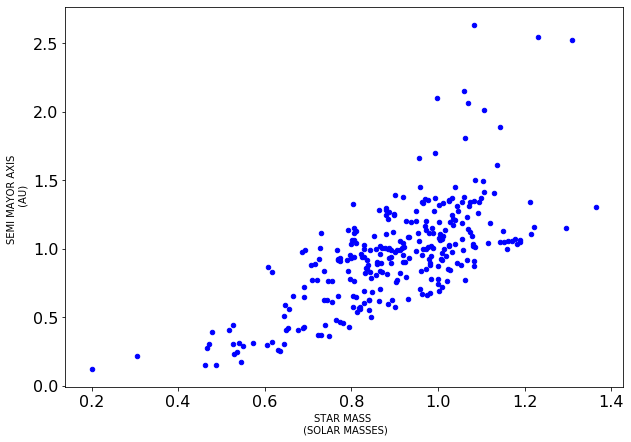

In [54]:
#Para los planetas dentro de la zona de habitabilidad:
#Masa de las estrellas vs la distancia del planeta a su estrella

fig, ax = plt.subplots(figsize=(10,7))
exo_habit.plot(kind='scatter',x='MSTAR',y='A',color='blue', fontsize =16, ax=ax)
ax.yaxis.set_label_text('SEMI MAYOR AXIS \n (AU)')
ax.xaxis.set_label_text('STAR MASS \n (SOLAR MASSES)')
plt.show()


#Entre mas masiva, mas lejos se encuentra el planeta de la estrella

Text(0.5, 0, 'SEMI MAYOR AXIS \n (AU)')

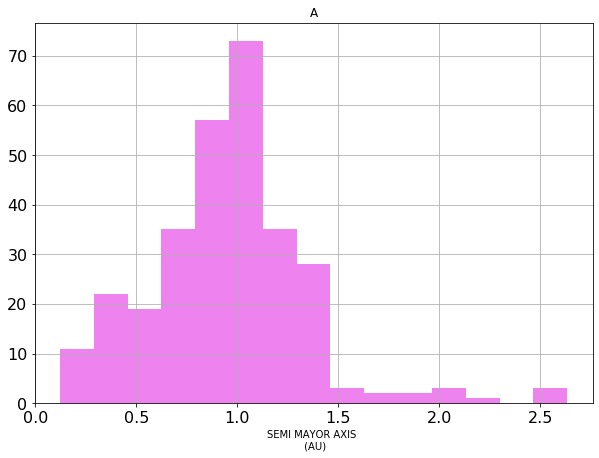

In [80]:
#Distribucion orbital de los planetas (histograma)

fig, ax = plt.subplots(figsize=(10,7))
exo_habit.hist(column='A', bins=15, color="violet", xlabelsize =16,ax=ax, ylabelsize=16)
ax.xaxis.set_label_text('SEMI MAYOR AXIS \n (AU)')

In [20]:
#planeta con densidad conocida en la zona de habitabilidad
exo_habit['DENSITY'].value_counts()

1.03091    1
Name: DENSITY, dtype: int64

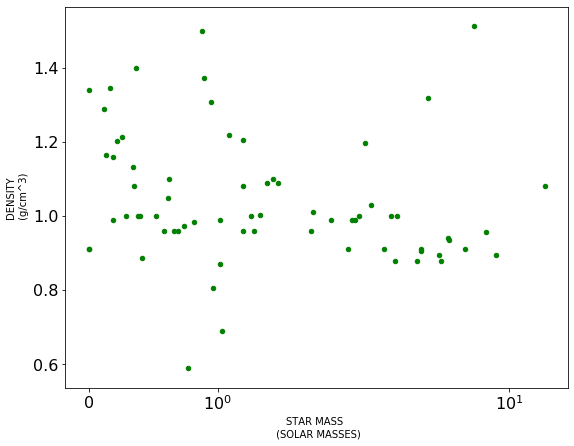

In [50]:
#Densidad Vs masa de las estrellas para todos los planetas 
#(dado que solo hay un planeta con densidad conocida, en la zona de habitabilidad)

fig, ax = plt.subplots(figsize=(9,7))
exo_zone.plot(kind='scatter',x='DENSITY',y='MSTAR',color='green', fontsize =16, ax=ax)
ax.set_xscale('symlog')
ax.xaxis.set_label_text('STAR MASS \n (SOLAR MASSES)')
ax.yaxis.set_label_text('DENSITY \n (g/cm^3)')
plt.show()


#hay muchos más planetas de baja densidad, probablemente gaseosos, para todo tipo de masas de estrellas

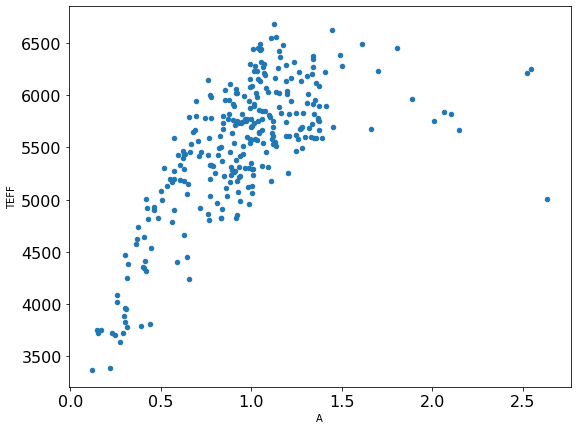

In [23]:
#Distancia a la estrella Vs Temperatura efectiva.

exo_habit.plot(kind='scatter',x='A',y='TEFF', fontsize =16, figsize=(9,7))